In [45]:
import pickle
with open('X_test.pk', 'rb') as handle:
    X_test = pickle.load(handle)
with open('X_train.pk', 'rb') as handle:
    X_train = pickle.load(handle)
with open('y_test.pk', 'rb') as handle:
    y_test = pickle.load(handle)
with open('y_train.pk', 'rb') as handle:
    y_train = pickle.load(handle)

In [46]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

SEED = 42

In [47]:
model = tf.keras.Sequential([
    Dense(40, input_shape=(43,), activation='relu'), #second layer
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid') #gives probability of ICU admission
])

In [48]:
model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"])

In [49]:
hist = model.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=100, # Adjust to see whether validation metrics continue to improve or start to overfit
          verbose=0, # Adjust to see training progress
          validation_split=0.3)

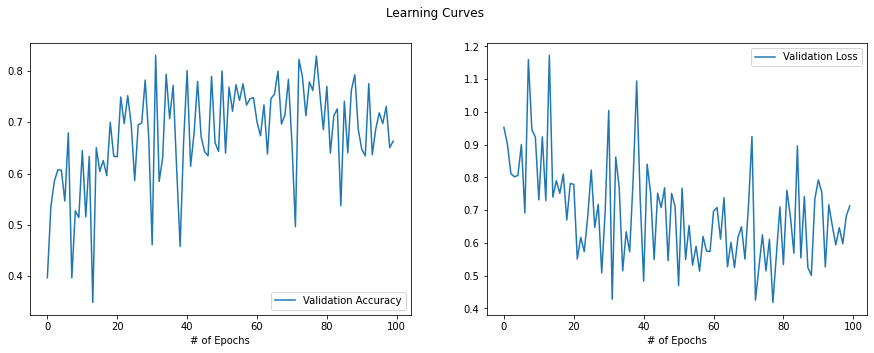

In [50]:
val_loss = hist.history["val_loss"]
val_accuracy = hist.history["val_accuracy"]

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.lineplot(x=range(0,len(val_accuracy)), y=val_accuracy, ax=ax[0], label="Validation Accuracy")
sns.lineplot(x=range(0,len(val_loss)), y=val_loss, ax=ax[1], label="Validation Loss")

ax[0].set_xlabel("# of Epochs")
ax[1].set_xlabel("# of Epochs")

plt.suptitle("Learning Curves")
plt.show()

In [51]:
class NeuralNetwork():
    def __init__(self, name, batch_size, epochs, learning_rate, verbose):
        self.name = name
        self.batch_size = batch_size
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.verbose = verbose
        self.model = Sequential()
        
    def add_(self, layer):
        self.model.add(layer)

    def compile_and_fit(self):
        self.model.compile(loss="mean_squared_error", optimizer=SGD(lr=self.learning_rate), metrics=["accuracy"])
        self.history = self.model.fit(x=X_train,
                                      y=y_train,
                                      batch_size=self.batch_size,
                                      epochs=self.epochs,
                                      verbose=self.verbose,
                                      validation_data=(X_valid, y_valid))
        self.val_loss = self.history.history["val_loss"]
        self.val_accuracy = self.history.history["val_accuracy"]
    
    def plot_learning_curves(self):
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        
        sns.lineplot(x=range(0,len(self.val_accuracy)), y=self.val_accuracy, ax=ax[0], label="Validation Accuracy")
        sns.lineplot(x=range(0,len(self.val_loss)), y=self.val_loss, ax=ax[1], label="Validation Loss")

        ax[0].set_xlabel("# of Epochs")
        ax[1].set_xlabel("# of Epochs")

        plt.suptitle("Learning Curves: {}".format(self.name))
        plt.show()

    def evaluate_(self):
        return self.model.evaluate(X_valid, y_valid)
    
    def save(self, filename):
        self.model.save("working/"+filename+".hd5")
        
    def summary_(self):
        return self.model.summary()

In [52]:
def compare_learning_curves(models):
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    
    for model in models:
        sns.lineplot(x=range(0,len(model.val_accuracy)), y=model.val_accuracy, ax=ax[0], label=model.name)
        sns.lineplot(x=range(0,len(model.val_loss)), y=model.val_loss, ax=ax[1], label=model.name)
    
    ax[0].set_xlabel("# of Epochs")
    ax[1].set_xlabel("# of Epochs")

    ax[0].set_title("Validation Accuracy")
    ax[1].set_title("Validation Loss")

    plt.suptitle("Learning Curves")
    plt.show()

In [53]:
batch_sizes = [8, 16, 32, 64, 128, 256]
n_epochs = 50

In [54]:
accuracy = pd.DataFrame(columns=batch_sizes, index=range(n_epochs))
loss = pd.DataFrame(columns=batch_sizes, index=range(n_epochs))
accuracy["Epoch"] = range(n_epochs)
loss["Epoch"] = range(n_epochs)

In [ ]:
for batch_size in batch_sizes:
    model = Sequential()
    model.add(Dense(40, activation="relu", input_shape=(43,)))
    model.add(Dense(20, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(loss="binary_crossentropy", optimizer=Adam(lr=0.01), metrics=["accuracy"])
    
    hist = model.fit(x=X_train,
              y=y_train,
              batch_size=batch_size,
              epochs=n_epochs,
              verbose=0,
              validation_split=0.3)
    
    accuracy[batch_size] = hist.history["val_accuracy"]
    loss[batch_size] = hist.history["val_loss"]

In [ ]:
accuracy_melt = accuracy.melt(value_name="Accuracy", var_name="Batch Size", id_vars=["Epoch"])
loss_melt = loss.melt(value_name="Loss", var_name="Batch Size", id_vars=["Epoch"])

accuracy_melt["Batch Size"] = accuracy_melt["Batch Size"].astype(object)
loss_melt["Batch Size"] = loss_melt["Batch Size"].astype(object)

In [ ]:
accuracy_melt = accuracy.melt(value_name="Accuracy", var_name="Batch Size", id_vars=["Epoch"])
loss_melt = loss.melt(value_name="Loss", var_name="Batch Size", id_vars=["Epoch"])

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.lineplot(x="Epoch", y="Accuracy", hue="Batch Size", data=accuracy_melt, ax=ax[0], legend="full")
sns.lineplot(x="Epoch", y="Loss", hue="Batch Size", data=loss_melt, ax=ax[1], legend="full")

ax[0].set_title("Validation Accuracy")
ax[1].set_title("Validation Loss")

ax[0].set_xlabel("# of Epochs")
ax[1].set_xlabel("# of Epochs")

plt.suptitle("Learning Curves")
plt.show()

In [ ]:
n_epochs = 100
batch_size = 128
verbose = 0

In [ ]:
learning_rate = 100
nn_lr_100 = NeuralNetwork("LR = {}".format(learning_rate), batch_size, n_epochs, learning_rate, verbose)
nn_lr_100.add_(Dense(40, activation="relu", input_shape=(43,)))
nn_lr_100.add_(Dense(20, activation="relu", input_shape=(43,)))
nn_lr_100.add_(Dense(1, activation="sigmoid"))

learning_rate = 1000
nn_lr_1000 = NeuralNetwork("LR = {}".format(learning_rate), batch_size, n_epochs, learning_rate, verbose)
nn_lr_1000.add_(Dense(40, activation="relu", input_shape=(43,)))
nn_lr_1000.add_(Dense(20, activation="relu", input_shape=(43,)))
nn_lr_1000.add_(Dense(1, activation="sigmoid"))

learning_rate = 10
nn_lr_10 = NeuralNetwork("LR = {}".format(learning_rate), batch_size, n_epochs, learning_rate, verbose)
nn_lr_10.add_(Dense(40, activation="relu", input_shape=(43,)))
nn_lr_10.add_(Dense(20, activation="relu", input_shape=(43,)))
nn_lr_10.add_(Dense(1, activation="sigmoid"))

learning_rate = 1
nn_lr_1 = NeuralNetwork("LR = {}".format(learning_rate), batch_size, n_epochs, learning_rate, verbose)
nn_lr_1.add_(Dense(40, activation="relu", input_shape=(43,)))
nn_lr_1.add_(Dense(20, activation="relu", input_shape=(43,)))
nn_lr_1.add_(Dense(1, activation="sigmoid"))

learning_rate = 0.1
nn_lr_p1 = NeuralNetwork("LR = {}".format(learning_rate), batch_size, n_epochs, learning_rate, verbose)
nn_lr_p1.add_(Dense(40, activation="relu", input_shape=(43,)))
nn_lr_p1.add_(Dense(20, activation="relu", input_shape=(43,)))
nn_lr_p1.add_(Dense(1, activation="sigmoid"))

learning_rate = 0.01 # default
nn_lr_p01 = NeuralNetwork("LR = {}".format(learning_rate), batch_size, n_epochs, learning_rate, verbose)
nn_lr_p01.add_(Dense(40, activation="relu", input_shape=(43,)))
nn_lr_p01.add_(Dense(20, activation="relu", input_shape=(43,)))
nn_lr_p01.add_(Dense(1, activation="sigmoid"))

learning_rate = 0.001
nn_lr_p001 = NeuralNetwork("LR = {}".format(learning_rate), batch_size, n_epochs, learning_rate, verbose)
nn_lr_p001.add_(Dense(40, activation="relu", input_shape=(43,)))
nn_lr_p001.add_(Dense(20, activation="relu", input_shape=(43,)))
nn_lr_p001.add_(Dense(1, activation="sigmoid"))

nn_lr_100.compile_and_fit()
nn_lr_1000.compile_and_fit()
nn_lr_10.compile_and_fit()
nn_lr_1.compile_and_fit()
nn_lr_p1.compile_and_fit()
nn_lr_p01.compile_and_fit()
nn_lr_p001.compile_and_fit()

In [ ]:
learning_rate = 0.1
nn_lr_p1 = NeuralNetwork("LR = {}".format(learning_rate), batch_size, n_epochs, learning_rate, verbose)
nn_lr_p1.add_(Dense(64, activation="sigmoid", input_shape=(784,)))
nn_lr_p1.add_(Dense(10, activation="softmax"))
nn_lr_p1.compile_and_fit()

In [ ]:
compare_learning_curves([nn_lr_1000, nn_lr_100, nn_lr_10, nn_lr_1, nn_lr_p1, nn_lr_p01, nn_lr_p001])